## Task

#### Goal
Using the data available in file concrete_data.xls. Apply feature engineering methods to obtain 85% to 95% accuracy  (tolerance limit 95% of the time (confidence level).

#### Resources Available 
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/

#### 1 - Exploratory data quality report reflecting the following
a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails,  missing values, outliers

b. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

c .Strategies to address the different data challenges such as data pollution, outliers and missing values



#### 2 - Feature Engineering techniques

a. Identify opportunities (if any) to create a composite feature, drop a feature

b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help

c .Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength



#### 3 - create the model

a . Obtain feature importance for the individual features using multiple methods and present your findings



#### 4 - Tuning the model

a. Algorithms that you think will be suitable for this project

b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

c. Model performance range at 95% confidence level




Import Libraries:

In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from pdpbox import pdp, get_dataset, info_plots
import statsmodels.api as sm
from scipy import stats
import shap
import random
import category_encoders as ce
from IPython.display import display, Image
import pydot
import os
from apyori import apriori
from random import sample 
import scipy.stats as stats
import scipy
from datetime import datetime
import category_encoders as ce
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import randint as sp_randint
from scipy.stats import zscore
import scipy.cluster.hierarchy as sch

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing 
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost
from sklearn.model_selection import StratifiedShuffleSplit
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import Imputer
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

import warnings 
warnings.filterwarnings('ignore')

Load and review data:

In [47]:
df = pd.read_csv("concrete (1).csv")
print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')
df.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age', 'Target']
df.head()

This dataset has 1030 rows, and 9 columns


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,Target
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


I found a function to reduce the memory size without loosing any information:

https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65

In [48]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

df, NAlist = reduce_mem_usage(df)

Memory usage of properties dataframe is : 0.0708465576171875  MB
******************************
Column:  cement
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  slag
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  ash
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  water
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  superplastic
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  coarseagg
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  fineagg
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  age
dtype before:  int64
dtype

Checking for nulls and data types:

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float32
slag            1030 non-null float32
ash             1030 non-null float32
water           1030 non-null float32
superplastic    1030 non-null float32
coarseagg       1030 non-null float32
fineagg         1030 non-null float32
age             1030 non-null uint16
Target          1030 non-null float32
dtypes: float32(8), uint16(1)
memory usage: 34.3 KB


Statistics summary of the dataframe:

In [50]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167877,104.506294,102.000000,192.375000,272.899994,350.000000,540.000000
slag,1030.0,73.895828,86.279190,0.000000,0.000000,22.000000,142.950001,359.399994
ash,1030.0,54.188358,63.997238,0.000000,0.000000,0.000000,118.300003,200.100006
water,1030.0,181.567337,21.354244,121.800003,164.899994,185.000000,192.000000,247.000000
superplastic,1030.0,6.204660,5.973845,0.000000,0.000000,6.400000,10.200000,32.200001
coarseagg,1030.0,972.919189,77.754013,801.000000,932.000000,968.000000,1029.400024,1145.000000
fineagg,1030.0,773.580933,80.175926,594.000000,730.950012,779.500000,824.000000,992.599976
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Target,1030.0,35.817959,16.705738,2.330000,23.710001,34.445002,46.135000,82.599998


Shuffle the dataset because some learning algorithms are sensitive to the order of the training instances. This will also guarantee that all cross-validation folds will be similar.

In [51]:
df = df.sample(frac=1,random_state=1)
df.reset_index(inplace=True,drop=True)

#### Normalize the data: 
The 'Target' column don't need to be normalized.

In [52]:
X = df.iloc[:,:-1]
y = df['Target']
columns = X.columns.to_list()
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = columns
extra_cols = df.iloc[:,-1:]
df = pd.concat([pd.DataFrame(X),pd.DataFrame(extra_cols)],axis=1)
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,Target
0,0.305936,0.436839,0.000000,0.560703,0.000000,0.498837,0.389112,0.244505,47.779999
1,0.664384,0.000000,0.000000,0.560703,0.000000,0.404070,0.411440,0.244505,48.790001
2,0.254566,0.000000,0.870565,0.261981,0.363354,0.730523,0.455344,0.035714,33.700001
3,0.121005,0.509182,0.000000,0.568690,0.279503,0.715116,0.258404,0.074176,18.280001
4,0.474886,0.000000,0.000000,0.560703,0.000000,0.491279,0.642248,0.016484,14.990000


## Unsupervised Learning: K-means Clustering Analysis

I will start by checking if there are any clusters within the data:

In [53]:
cluster_range = range(1,11) 
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init=5)
  clusters.fit(df.iloc[:,:-1])
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_ )
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,413.682647
1,2,295.373427
2,3,246.712276
3,4,211.708811
4,5,186.196405
5,6,166.252267
6,7,151.889041
7,8,139.709950
8,9,133.777581
9,10,122.631186


Elbow plot:

Text(0.5, 0, 'Number of Clusters')

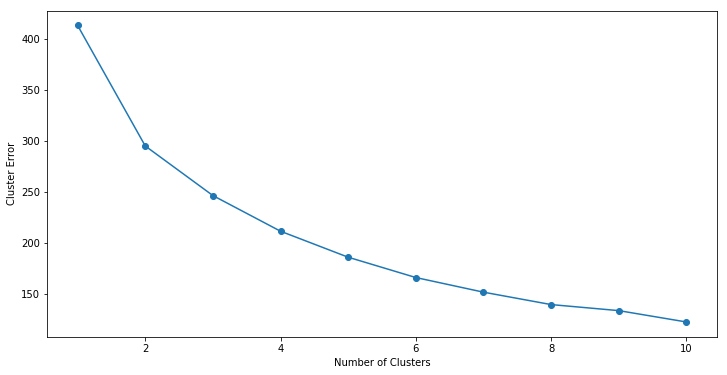

In [54]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.ylabel('Cluster Error')
plt.xlabel('Number of Clusters')

It might be hard to decide if there are 2 or 3 clusters. Let's perform an hierarchical clustering analysis, using the dendrogram to find the optimal number of clusters.

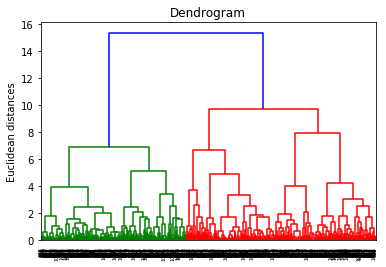

In [55]:
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:,:-1], method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

I can decide the number of optimal clusters by looking at the longest vertical line that doesn't cross any extended horizzontal line. From this, I can conclude that are 2 clusters.

Now let's fit the Hierarchical Clustering to the dataset:

In [56]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
df['group'] = hc.fit_predict(df.iloc[:,:-1])

print('There are %.0f records in the group 0 \nThere are %.0f records in the group 1' % (df.groupby('group').count().Target[0],df.groupby('group').count().Target[1]))

There are 583 records in the group 0 
There are 447 records in the group 1


## Following approach:

I need to be very careful to not add any bias to the analysis. This is what I will do:
- Using a stratified (by group) shuffle sample approach to split the dataset in training and test set.
- Clipping the outliers only for the training set to keep the test set unbiased.
- Applying the same transformation to training and test set to make the shape of the distributions similar to bell curves

## Spliting the data in train and test set
I am going to use 70% of data for training and 30% for testing

In [57]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1)
for train_index, test_index in split.split(df, df['group']):
    train = df.loc[train_index]
    test = df.loc[test_index]
    
print('%.0f records (%.0f%%) are used for training \n%.0f records (%.0f%%) are used for testing' % (len(train), (100*len(train)/len(df)), len(test), (100*len(test)/len(df))))

721 records (70%) are used for training 
309 records (30%) are used for testing


Check 'group' ratio of the split data. This is a sanity check to assure a correct stratified sampling of the groups: we would like to have similar ratio in the original dataset, training and test set.

In [58]:
df_ratio = pd.DataFrame(round(df.groupby(['group']).count().Target/len(df),4))
train_ratio = pd.DataFrame(round(train.groupby(['group']).count().Target/len(train),4))
test_ratio = pd.DataFrame(round(test.groupby(['group']).count().Target/len(test),4))
Stratified_split = pd.concat([df_ratio,train_ratio,test_ratio],axis=1)
Stratified_split.columns = ['df','train','test']
Stratified_split

,df,train,test
group,,,
0,0.566,0.5659,0.5663
1,0.434,0.4341,0.4337


## Univariate analysis:

Let's visualize the boxplot distributions by groups per each features for the training set:

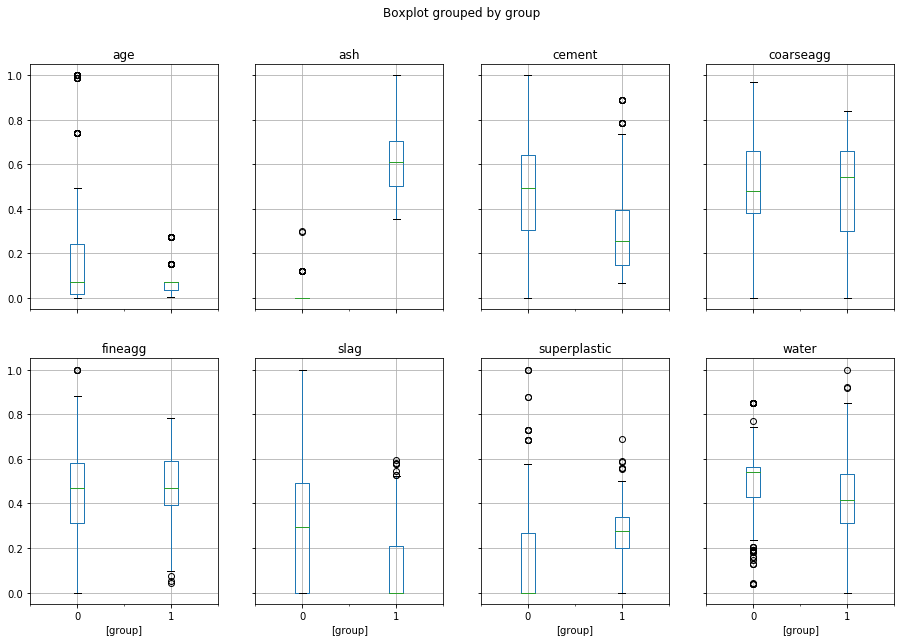

In [59]:
boxplots = train.drop(['Target'],axis=1).boxplot(by='group',  layout=(2,4), figsize=(15, 10))

There are many outliers. I am going to cap them:

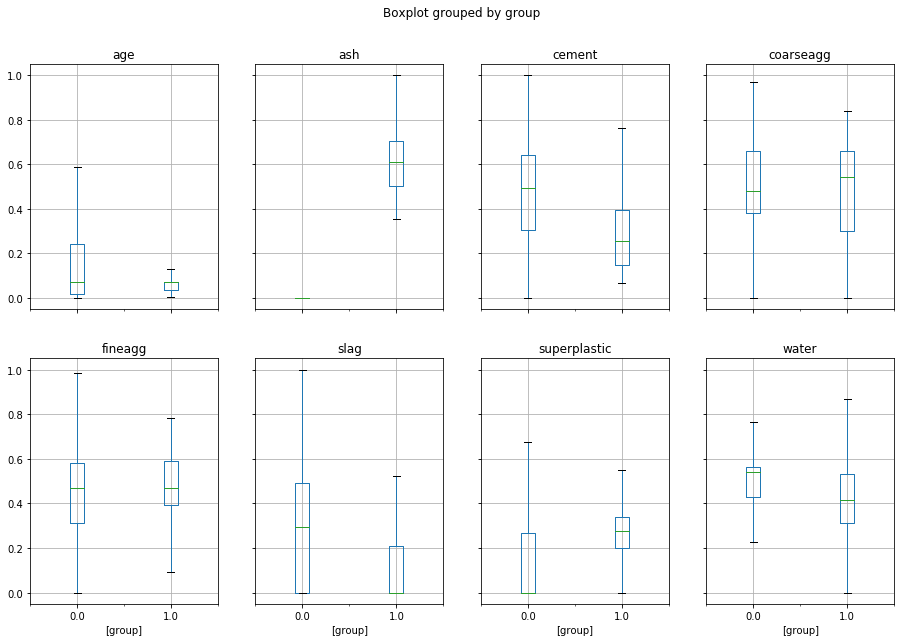

In [60]:
copy = train
groups = train['group'].unique()
fratures = copy.columns.to_list()
fratures[:-2]
for f in fratures:
    for n in groups:
        Q1 = np.percentile(copy[copy['group']==n][f],25)
        Q3 = np.percentile(copy[copy['group']==n][f],75)
        copy.loc[(copy['group']==n) & (copy[f]>Q3+1.5*(Q3-Q1)),f] = Q3+1.5*(Q3-Q1)
        copy.loc[(copy['group']==n) & (copy[f]<Q1-1.5*(Q3-Q1)),f] = Q1-1.5*(Q3-Q1)
        
boxplots = copy.drop(['Target'],axis=1).boxplot(by='group',  layout=(2,4), figsize=(15, 10))

Adjusting the 'cement':
- Applied transformation because the distribution was slightly skewed to the right

Text(0.5, 1.0, 'Transformed distribution CEMENT')

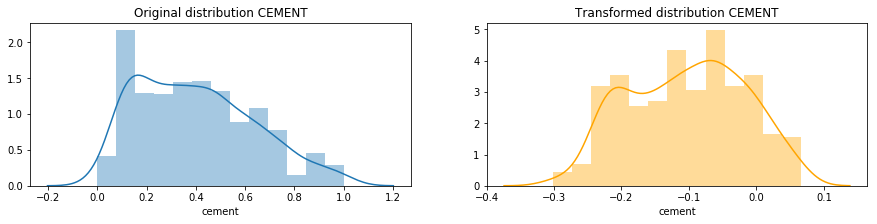

In [61]:
feature, axs = plt.subplots(ncols = 2, figsize=(15, 3))
sns.distplot(train['cement'], ax=axs[0]).set_title('Original distribution CEMENT')
T = train.copy()
train['cement'] = np.log(train['cement']+0.3)**1/4
test['cement'] = np.log(test['cement']+0.3)**1/4
sns.distplot(train['cement'], color='orange', ax=axs[1]).set_title('Transformed distribution CEMENT')

Normalize a second time the training set:

In [62]:
X = train.iloc[:,:-2]
columns = X.columns.to_list()
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = columns
extra_cols = train.iloc[:,-2:]
extra_cols.reset_index(inplace=True,drop=True)
train = pd.concat([pd.DataFrame(X),pd.DataFrame(extra_cols)],axis=1)
train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,Target,group
0,0.653147,0.403450,0.000,0.517734,0.368876,0.603060,0.242471,0.126464,41.049999,0.0
1,0.231833,0.511686,0.716,0.663289,0.424207,0.235823,0.266718,0.126464,28.990000,1.0
2,0.981794,0.000000,0.000,0.619070,0.000000,0.972097,0.048494,0.838407,61.919998,0.0
3,0.802770,0.000000,0.000,0.582220,0.000000,0.717072,0.357325,0.126464,39.090000,0.0
4,0.577610,0.000000,0.487,0.357439,0.544092,0.518752,0.718734,0.126464,48.279999,1.0


Aplying the same normalization to the test set:

In [63]:
X = test.iloc[:,:-2]
columns = X.columns.to_list()
X = pd.DataFrame(scaler.transform(X))
X.columns = columns
extra_cols = test.iloc[:,-2:]
extra_cols.reset_index(inplace=True,drop=True)
test = pd.concat([pd.DataFrame(X),pd.DataFrame(extra_cols)],axis=1)
test.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,Target,group
0,0.810404,0.263495,0.0000,0.235836,0.525648,0.437444,0.658754,0.257611,73.699997,0
1,0.520069,0.000000,0.4940,0.225702,0.654755,0.560456,0.752935,0.257611,55.830002,1
2,0.708591,0.105732,0.0000,0.978351,0.000000,0.393039,0.193977,1.704918,56.139999,0
3,0.280655,0.117418,0.6215,0.336251,0.497983,0.839484,0.516080,0.060890,23.510000,1
4,0.641091,0.000000,0.0000,0.655919,0.000000,0.501050,0.556406,1.704918,36.150002,0


Let's compare the columns to check if there are any mistakes:

In [64]:
comparison = pd.concat([pd.DataFrame(train.min()),pd.DataFrame(test.min()),pd.DataFrame(train.max()),pd.DataFrame(test.max())],axis=1)
comparison.columns = ['train_min','test_min','train_max','test_max']
comparison

,train_min,test_min,train_max,test_max
cement,0.00,0.031938,1.000000,1.000000
slag,0.00,0.000000,1.000000,0.951864
ash,0.00,0.000000,1.000000,1.000500
water,0.00,0.000000,1.000000,1.152464
superplastic,0.00,0.000000,1.000000,1.484726
coarseagg,0.00,0.000000,1.000000,1.032103
fineagg,0.00,0.000000,1.000000,1.017356
age,0.00,0.000000,1.000000,1.704918
Target,3.32,2.330000,82.599998,80.199997
group,0.00,0.000000,1.000000,1.000000


All good! Now I am finally ready create the the subset for training and testing:

In [65]:
X_train = train.drop(['Target','group'],axis=1)
X_test = test.drop(['Target','group'],axis=1)
y_train = train['Target']
y_test = test['Target']

## Multivariate analysis:

Identify Correlation in data:

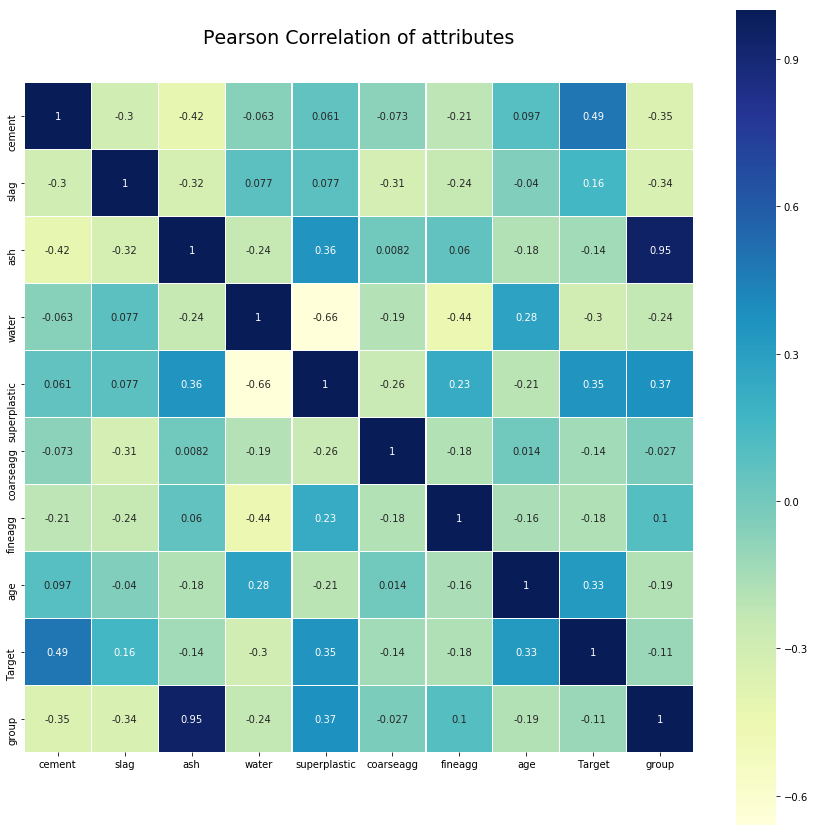

In [24]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(train.corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap='YlGnBu', 
            linecolor='white',
            annot=True)

#### Considerations:
- Positive correlation between the 'Target' variable & 'cement' and 'age'.
- There is a strong negative correlation between 'water' and 'superplastic'. The abs correlation is < 0.7 (critical value) and then I am going to keep both the features in the model.
- There is a very strong correlation between 'ash' and the groups created.

Pairplot: you can zoom the chart by double-clicking on it.

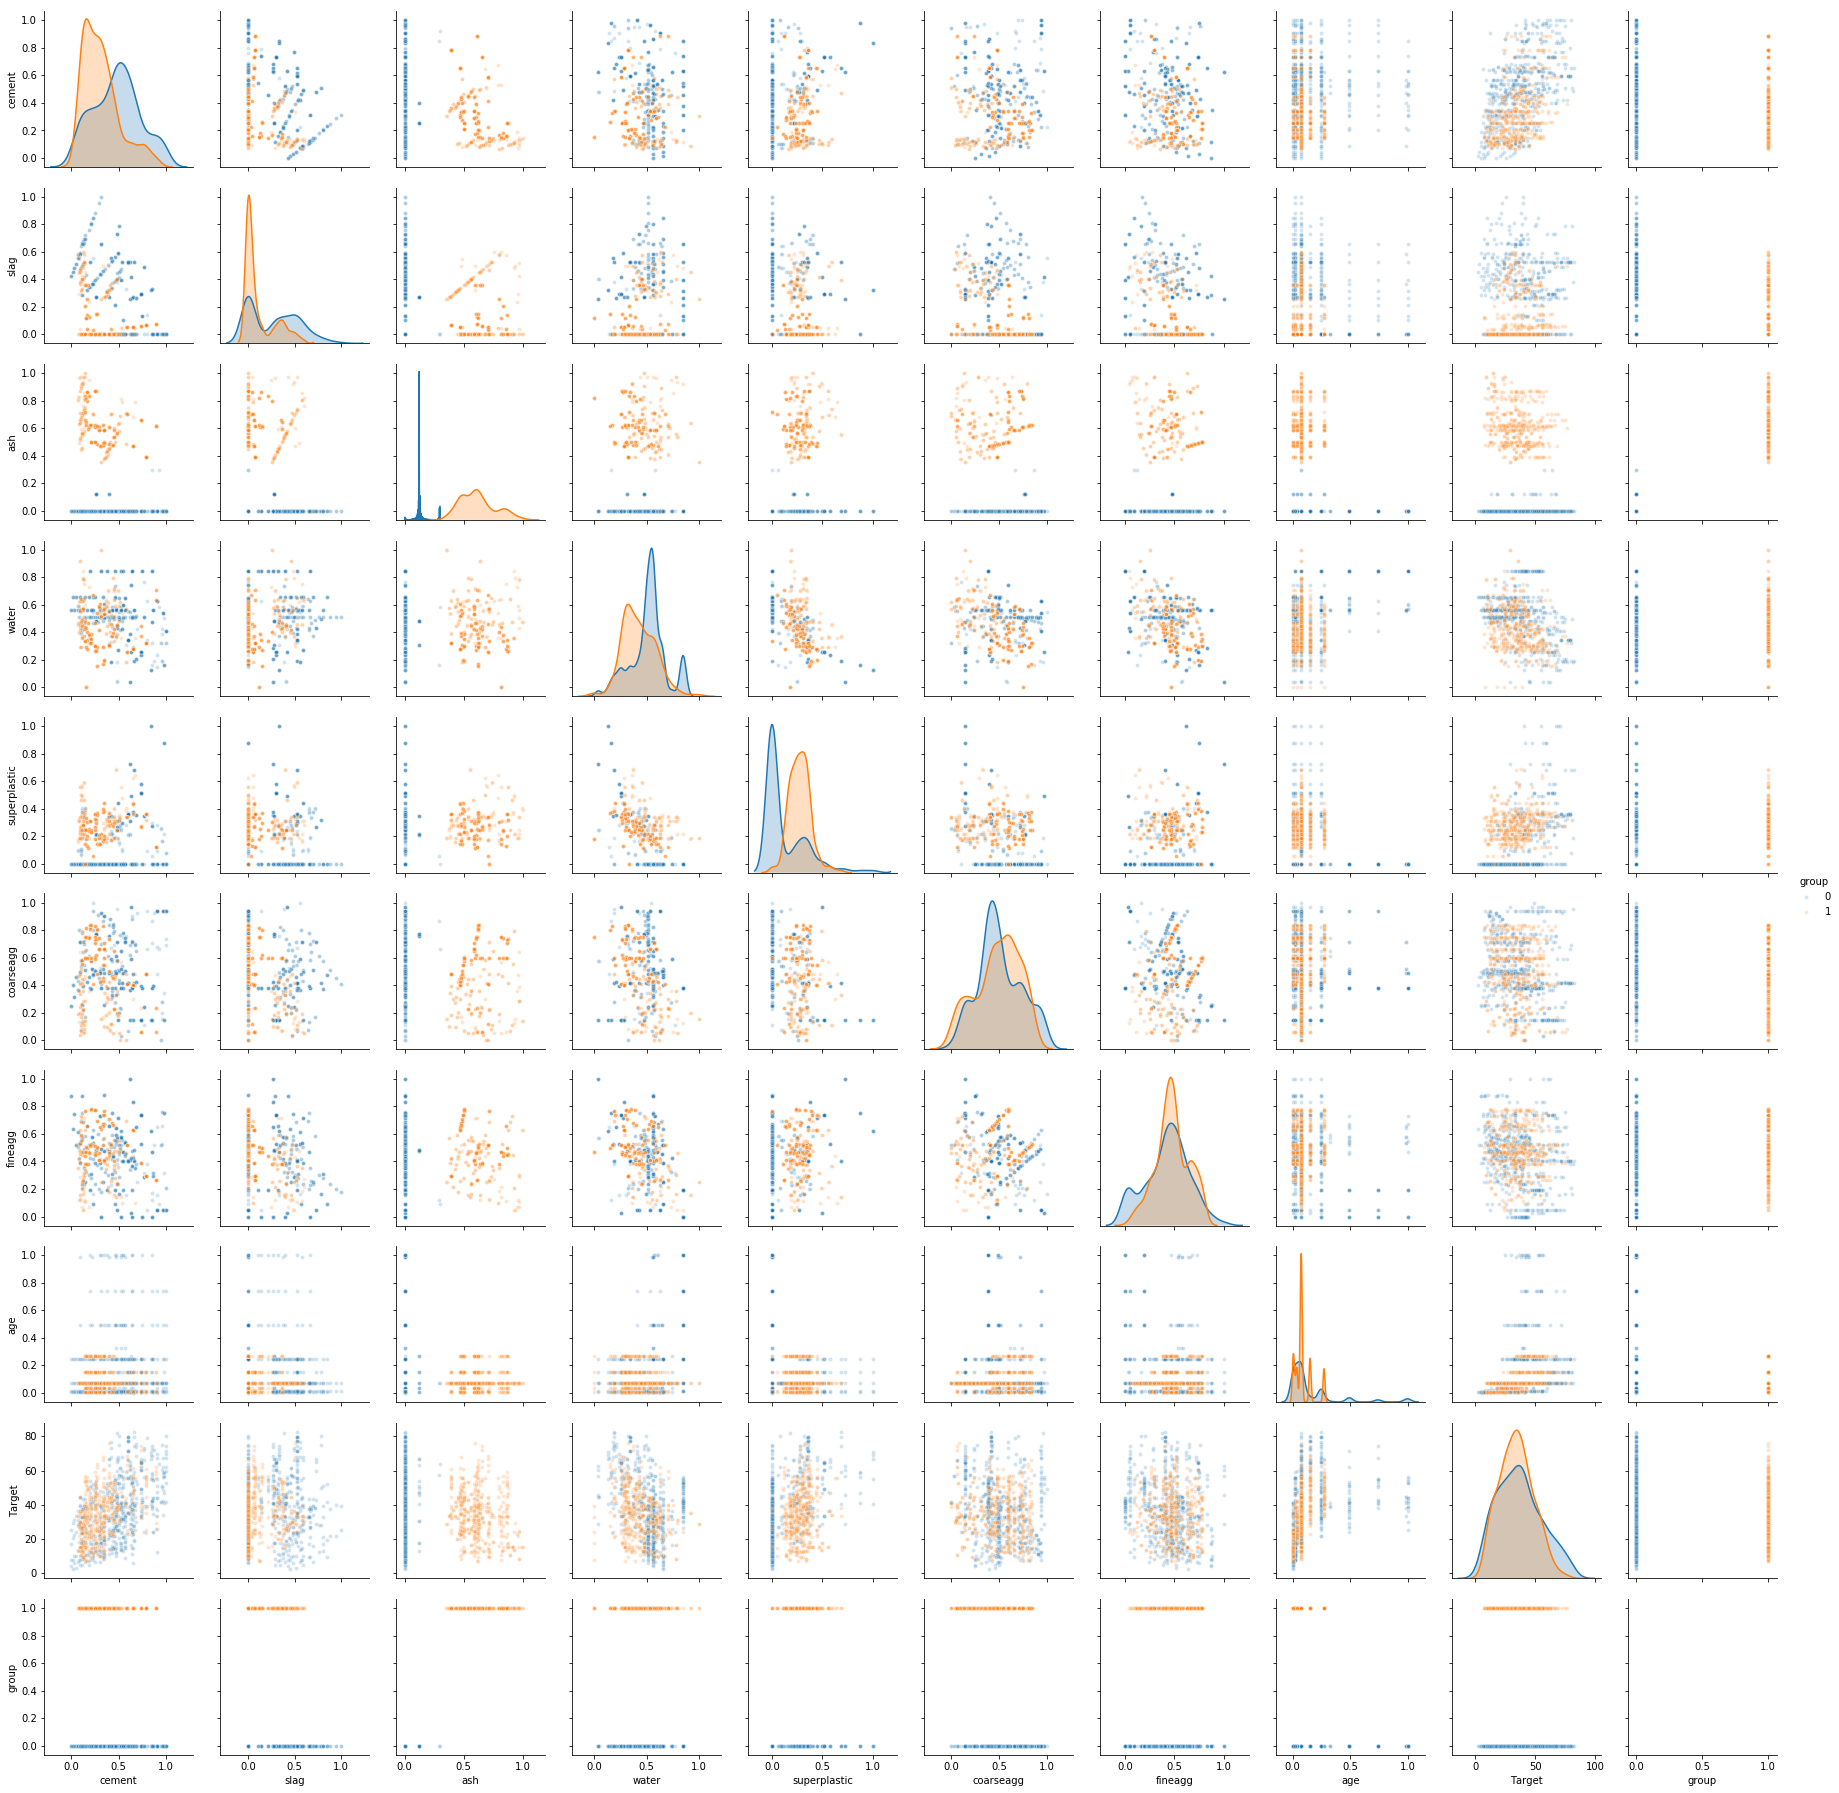

In [22]:
sns.pairplot(df,
             diag_kind='kde',
             hue='group',
             plot_kws={"s": 15,'alpha': 0.2})

I can also see in the pairplot the different gaussians in the feature 'ash' and 'superplastic'.

## Randomized search with cross-validation for hyperparameters tuning:

I am going to use MAE as my reference score.

In [66]:
def tuning(model,parameters,iteration=50,n_folds=10,X_train=X_train,y_train=y_train):
    start1=datetime.now()
    randomCV1 = RandomizedSearchCV(model,
                                   param_distributions=parameters,
                                   n_iter=5,
                                   cv=n_folds,
                                   random_state=1)
    randomCV1.fit(X_train, y_train)
    stop1=datetime.now()
    execution_time1 = stop1-start1
    print('Expected execution time is about',iteration*execution_time1/5,'\n')
    
    start=datetime.now()
    randomCV = RandomizedSearchCV(model,
                                  param_distributions=parameters,
                                  n_iter=iteration,
                                  cv=n_folds,
                                  random_state=1)
    randomCV.fit(X_train, y_train)
    stop=datetime.now()
    execution_time = stop-start
    print('Execution time =',execution_time,'\n')
    print('The best combination of hyperparameters is:\n\n',randomCV.best_params_)

#### KNN

In [28]:
param_dist = {'n_neighbors':sp_randint(2, 20)}
tuning(KNeighborsRegressor(),param_dist)

Expected execution time is about 0:00:05.732850 

Execution time = 0:00:05.683499 

The best combination of hyperparameters is:

 {'n_neighbors': 5}


Saving KNN hyperparameters:

In [67]:
knn_hyperparameters = {'n_neighbors': 5}

#### RIDGE

In [30]:
param_dist = {'alpha': np.linspace(0.01,1,100)}
tuning(Ridge(),param_dist)

Expected execution time is about 0:00:03.118790 

Execution time = 0:00:02.609769 

The best combination of hyperparameters is:

 {'alpha': 0.11}


Saving RIDGE hyperparameters:

In [68]:
ridge_hyperparameters = {'alpha': 0.11}

#### LASSO

In [32]:
param_dist = {'alpha': np.linspace(0.01,1,100)}
tuning(Lasso(),param_dist)

Expected execution time is about 0:00:02.357850 

Execution time = 0:00:02.308909 

The best combination of hyperparameters is:

 {'alpha': 0.03}


Saving LASSO hyperparameters:

In [70]:
lasso_hyperparameters = {'alpha': 0.03}

#### ELASTIC NET

In [34]:
param_dist = {'alpha': np.linspace(0.1,10,100),
             'l1_ratio': np.linspace(0,1,11),}
tuning(ElasticNet(),param_dist)

Expected execution time is about 0:00:03.093730 

Execution time = 0:00:02.555975 

The best combination of hyperparameters is:

 {'l1_ratio': 0.8, 'alpha': 0.4}


Saving ELASTICNET hyperparameters:

In [71]:
elasticnet_hyperparameters = {'l1_ratio': 0.8, 
                              'alpha': 0.4}

#### SVM

In [36]:
param_dist = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'C': np.linspace(0.1,10,100),
              'gamma': np.linspace(0.1,10,100)}
tuning(SVR(),param_dist)

Expected execution time is about 0:01:17.172370 

Execution time = 0:16:03.428657 

The best combination of hyperparameters is:

 {'kernel': 'poly', 'gamma': 2.7, 'C': 8.6}


Saving SVM hyperparameters:

In [72]:
svm_hyperparameters = {'kernel': 'poly', 
                       'gamma': 2.7, 
                       'C': 8.6}

#### DECISION TREE

In [38]:
param_dist = {'max_depth': sp_randint(1, X.shape[1]+1)}
tuning(DecisionTreeRegressor(),param_dist)

Expected execution time is about 0:00:03.539600 

Execution time = 0:00:02.453286 

The best combination of hyperparameters is:

 {'max_depth': 8}


Saving Decision Tree hyperparameters:

In [73]:
dtree_hyperparameters = {'max_depth': 8}

#### BAGGING

In [40]:
param_dist = {'n_estimators': sp_randint(10, 500),
              'max_samples': sp_randint(10, 500),
              'oob_score': [True,False]}
tuning(BaggingRegressor(),param_dist)

Expected execution time is about 0:01:49.026520 

Execution time = 0:02:41.612040 

The best combination of hyperparameters is:

 {'max_samples': 470, 'n_estimators': 81, 'oob_score': False}


Saving Bagging hyperparameters:

In [74]:
bag_hyperparameters = {'max_samples': 470, 
                       'n_estimators': 81, 
                       'oob_score': False}

#### RANDOM FOREST

In [42]:
param_dist = {'n_estimators': sp_randint(10, 500),
              'max_depth': sp_randint(1, X.shape[1]+1),
              'max_features': sp_randint(1, X.shape[1]+1),
              'min_samples_split': sp_randint(2, X.shape[1]+1),
              'min_samples_leaf': sp_randint(1, X.shape[1]+1),
              'bootstrap': [True, False]}
tuning(RandomForestRegressor(),param_dist)

Expected execution time is about 0:02:40.931230 

Execution time = 0:02:13.084865 

The best combination of hyperparameters is:

 {'bootstrap': True, 'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 343}


Saving Random Forest hyperparameters:

In [75]:
rf_hyperparameters = {'bootstrap': True, 
                      'max_depth': 8, 
                      'max_features': 8, 
                      'min_samples_leaf': 2, 
                      'min_samples_split': 3, 
                      'n_estimators': 343}

#### ADABOOST

In [44]:
param_dist = {'n_estimators': sp_randint(10, 500),
              'learning_rate': np.linspace(0.01,1,100)}
tuning(AdaBoostRegressor(),param_dist)

Expected execution time is about 0:02:21.959280 

Execution time = 0:02:41.310713 

The best combination of hyperparameters is:

 {'learning_rate': 0.38, 'n_estimators': 245}


Saving Adaboost hyperparameters:

In [76]:
ada_hyperparameters = {'learning_rate': 0.38, 
                       'n_estimators': 245}

#### XGBOOST

In [45]:
param_dist = {'n_estimators': sp_randint(10, 500),
              'learning_rate': np.linspace(0.01,1,30),
              'max_depth': sp_randint(1, X.shape[1]+1),
              'subsample': [0.5,0.8],
              'colsample_bytree': np.linspace(0.2,1,10),
              'gamma': np.linspace(0.1,5,10),
              'booster': ['dart','gblinear'],
              'objective': ['reg:squarederror']
             }
tuning(XGBRegressor(),param_dist)

Expected execution time is about 0:16:52.654440 

Execution time = 0:08:42.418812 

The best combination of hyperparameters is:

 {'booster': 'dart', 'colsample_bytree': 0.6444444444444445, 'gamma': 3.366666666666667, 'learning_rate': 0.07827586206896552, 'max_depth': 5, 'n_estimators': 485, 'objective': 'reg:squarederror', 'subsample': 0.8}


Saving XGBoost hyperparameters:

In [77]:
xgb_hyperparameters = {'booster': 'dart', 
                       'colsample_bytree': 0.6444444444444445, 
                       'gamma': 3.366666666666667, 
                       'learning_rate': 0.07827586206896552, 
                       'max_depth': 5, 
                       'n_estimators': 485, 
                       'objective': 'reg:squarederror', 
                       'subsample': 0.8}

#### LIGHT GBM

In [47]:
param_dist = {'application': ['regression'],
              'feature_fraction': np.linspace(0.3,1,8),
              'erbose_eval': [False,True],
              'booster': ['dart','gbdt'],
              'num_leaves': sp_randint(2, X.shape[1]+1),
              'max_depth': sp_randint(1, X.shape[1]+1),
              'max_bin': sp_randint(10, 200),
              'n_estimators': sp_randint(10, 500),
              'learning_rate': np.linspace(0.01,1,30)}
tuning(LGBMRegressor(),param_dist,20)

Expected execution time is about 0:00:09.210408 

Execution time = 0:00:11.471871 

The best combination of hyperparameters is:

 {'application': 'regression', 'booster': 'dart', 'erbose_eval': True, 'feature_fraction': 0.7, 'learning_rate': 0.14655172413793105, 'max_bin': 113, 'max_depth': 8, 'n_estimators': 311, 'num_leaves': 6}


Saving Light GBM hyperparameters:

In [78]:
lgbm_hyperparameters = {'application': 'regression', 
                        'booster': 'dart', 
                        'erbose_eval': True, 
                        'feature_fraction': 0.7, 
                        'learning_rate': 0.14655172413793105, 
                        'max_bin': 113, 
                        'max_depth': 8, 
                        'n_estimators': 311, 
                        'num_leaves': 6}

Below are defined all the models:

In [79]:
knn = KNeighborsRegressor(n_neighbors=knn_hyperparameters.get('n_neighbors'))

ridge = Ridge(alpha=ridge_hyperparameters.get('alpha'),
             random_state=1)

lasso = Lasso(alpha=lasso_hyperparameters.get('alpha'),
             random_state=1)

elasticnet = ElasticNet(alpha=elasticnet_hyperparameters.get('alpha'),
                        l1_ratio=elasticnet_hyperparameters.get('l1_ratio'),
                        random_state=1)

svm = SVR(kernel=svm_hyperparameters.get('kernel'),
          C=svm_hyperparameters.get('C'),
          gamma=svm_hyperparameters.get('gamma'))

dtree = DecisionTreeRegressor(max_depth=dtree_hyperparameters.get('max_depth'),
                              random_state=1)

bag = BaggingRegressor(n_estimators=bag_hyperparameters.get('n_estimators'),
                       max_samples=bag_hyperparameters.get('max_samples'),
                       oob_score=bag_hyperparameters.get('oob_score'),
                       random_state=1)

rf = RandomForestRegressor(n_estimators=rf_hyperparameters.get('n_estimators'),
                           max_depth=rf_hyperparameters.get('max_depth'),
                           max_features=rf_hyperparameters.get('max_features'),
                           min_samples_split=rf_hyperparameters.get('min_samples_split'),
                           min_samples_leaf=rf_hyperparameters.get('min_samples_leaf'),
                           bootstrap=rf_hyperparameters.get('bootstrap'),
                           random_state=1)

ada = AdaBoostRegressor(n_estimators=ada_hyperparameters.get('n_estimators'),
                        learning_rate=ada_hyperparameters.get('learning_rate'),
                        random_state=1)

xgb = xgboost.XGBRegressor(n_estimators=xgb_hyperparameters.get('n_estimators'),
                   learning_rate=xgb_hyperparameters.get('learning_rate'),
                   max_depth=xgb_hyperparameters.get('max_depth'),
                   subsample=xgb_hyperparameters.get('subsample'),
                   colsample_bytree=xgb_hyperparameters.get('colsample_bytree'),
                   gamma=xgb_hyperparameters.get('gamma'),
                   booster=xgb_hyperparameters.get('booster'),
                   objective= xgb_hyperparameters.get('objective'),
                   random_state=1)

lgbm = LGBMRegressor(application=lgbm_hyperparameters.get('application'),
                     objective=lgbm_hyperparameters.get('objective'),
                     is_unbalance=lgbm_hyperparameters.get('is_unbalance'),
                     feature_fraction=lgbm_hyperparameters.get('feature_fraction'),
                     bagging_fraction=lgbm_hyperparameters.get('bagging_fraction'),
                     bagging_freq=lgbm_hyperparameters.get('bagging_freq'),
                     verbose=lgbm_hyperparameters.get('verbose'),
                     booster=lgbm_hyperparameters.get('booster'),                  
                     erbose_eval=lgbm_hyperparameters.get('erbose_eval'),
                     num_leaves=lgbm_hyperparameters.get('num_leaves'),
                     max_depth=lgbm_hyperparameters.get('max_depth'),
                     max_bin=lgbm_hyperparameters.get('max_bin'),                      
                     n_estimators=lgbm_hyperparameters.get('n_estimators'),     
                     learning_rate=lgbm_hyperparameters.get('learning_rate'), 
                     random_state=1)

Redefining the list of all the models I need to evaluate:

In [80]:
models_list = [{'label': 'KNN','model': knn,}, 
               {'label': 'Ridge','model': ridge,},   
               {'label': 'Lasso','model': lasso,},   
               {'label': 'ElasticNet','model': elasticnet,},   
               {'label': 'SVM','model': svm,},
               {'label': 'Decision Tree','model': dtree,},
               {'label': 'Bagging','model': bag,},               
               {'label': 'Random Forest','model': rf,},
               {'label': 'Adaboost','model': ada,},
               {'label': 'XGBoost','model': xgb,}, 
               {'label': 'Light GBM','model': lgbm,},]

Defining a function to evaluate the models:

In [81]:
def models_evaluation(models,X_train=X_train, X_test=X_test, y_train=y_train, plot=False):
    """
    Return the join plot for the distribution of Actual vs Predicted values and
    the MAE for every model contained in the 'models' list
    """
    Models = []
    MAEs = []
    MEAs_train = []
    for i in range(0,len(models)):
        model = models[i].get('model')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        MAE = round(metrics.mean_absolute_error(y_test, y_pred),3)
        MAE_train = round(metrics.mean_absolute_error(y_train, y_pred_train),3)
        Models.append(models[i].get('label'))
        MAEs.append(MAE)
        MEAs_train.append(MAE_train)
        if plot!=False:
            sns.jointplot(height=5, x=y_test.values.reshape(len(y_test),), y=pd.DataFrame(y_pred).values.reshape(len(y_pred),), kind="reg").annotate(stats.pearsonr)
            plt.ylabel('Predicted')
            plt.xlabel('True')
            print('\n\n     ',models[i].get('label'))
            plt.show()
    report = pd.concat([pd.DataFrame(Models),pd.DataFrame(MAEs),pd.DataFrame(MEAs_train)],axis=1)
    report.columns = ['Model','MAE','MEA training']
    report = report.sort_values('MAE')
    report.set_index('Model',inplace=True,drop=True)
    return(report)

Evaluation of all the models contained in 'models_list':



      KNN


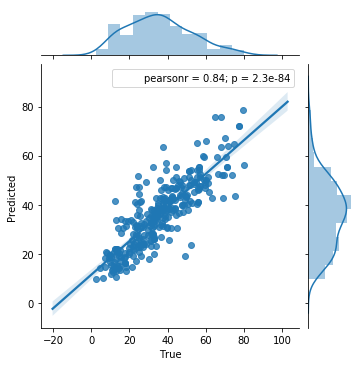



      Ridge


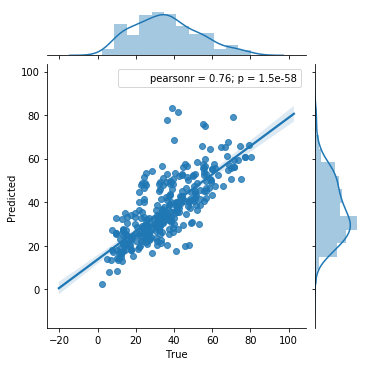



      Lasso


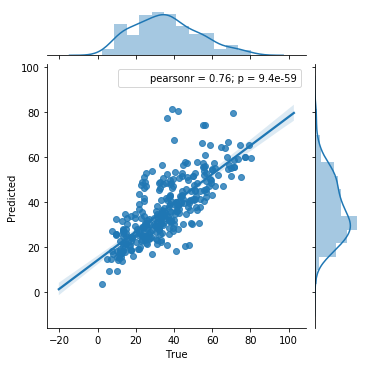



      ElasticNet


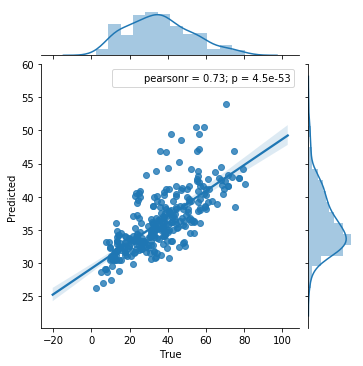



      SVM


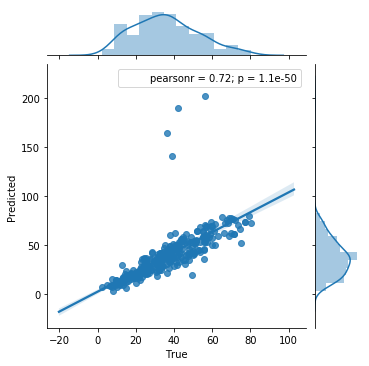



      Decision Tree


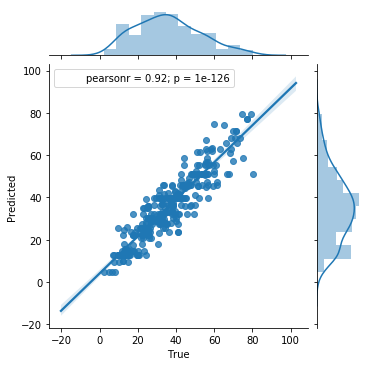



      Bagging


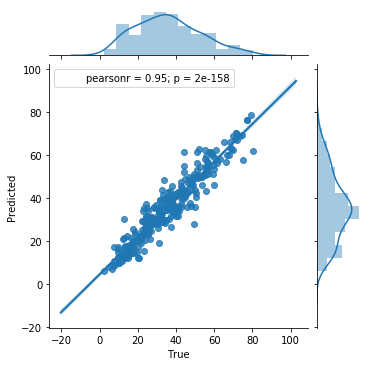



      Random Forest


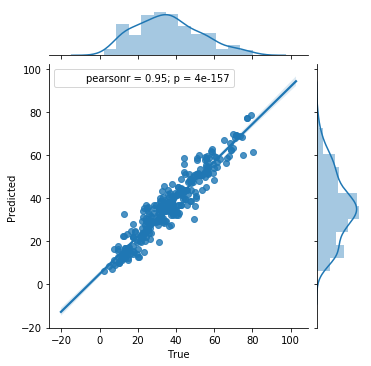



      Adaboost


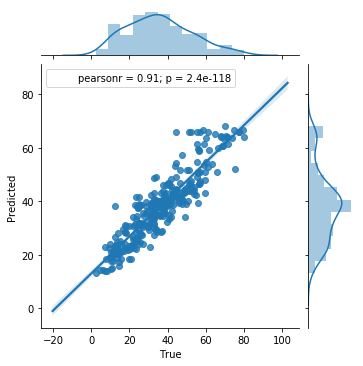



      XGBoost


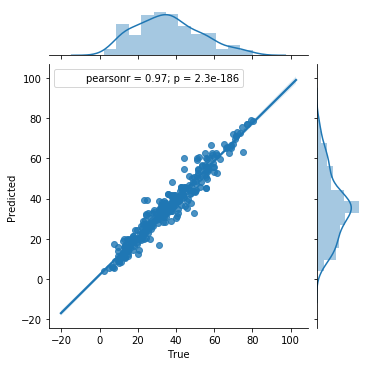



      Light GBM


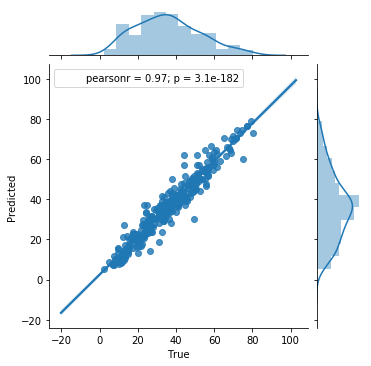

,MAE,MEA training
Model,,
XGBoost,2.975,0.870
Light GBM,3.146,1.810
Bagging,3.802,2.097
Random Forest,3.925,2.487
Decision Tree,4.877,2.447
Adaboost,6.281,5.913
KNN,6.704,5.024
SVM,7.099,3.477
Ridge,8.462,7.534


In [83]:
models_evaluation(models_list, plot=True)

XGBoost and Light GBM have very similar performances on the test set, but light GBM is much faster. I could also plot one tree of the ensemble:

Plotting 1st tree...


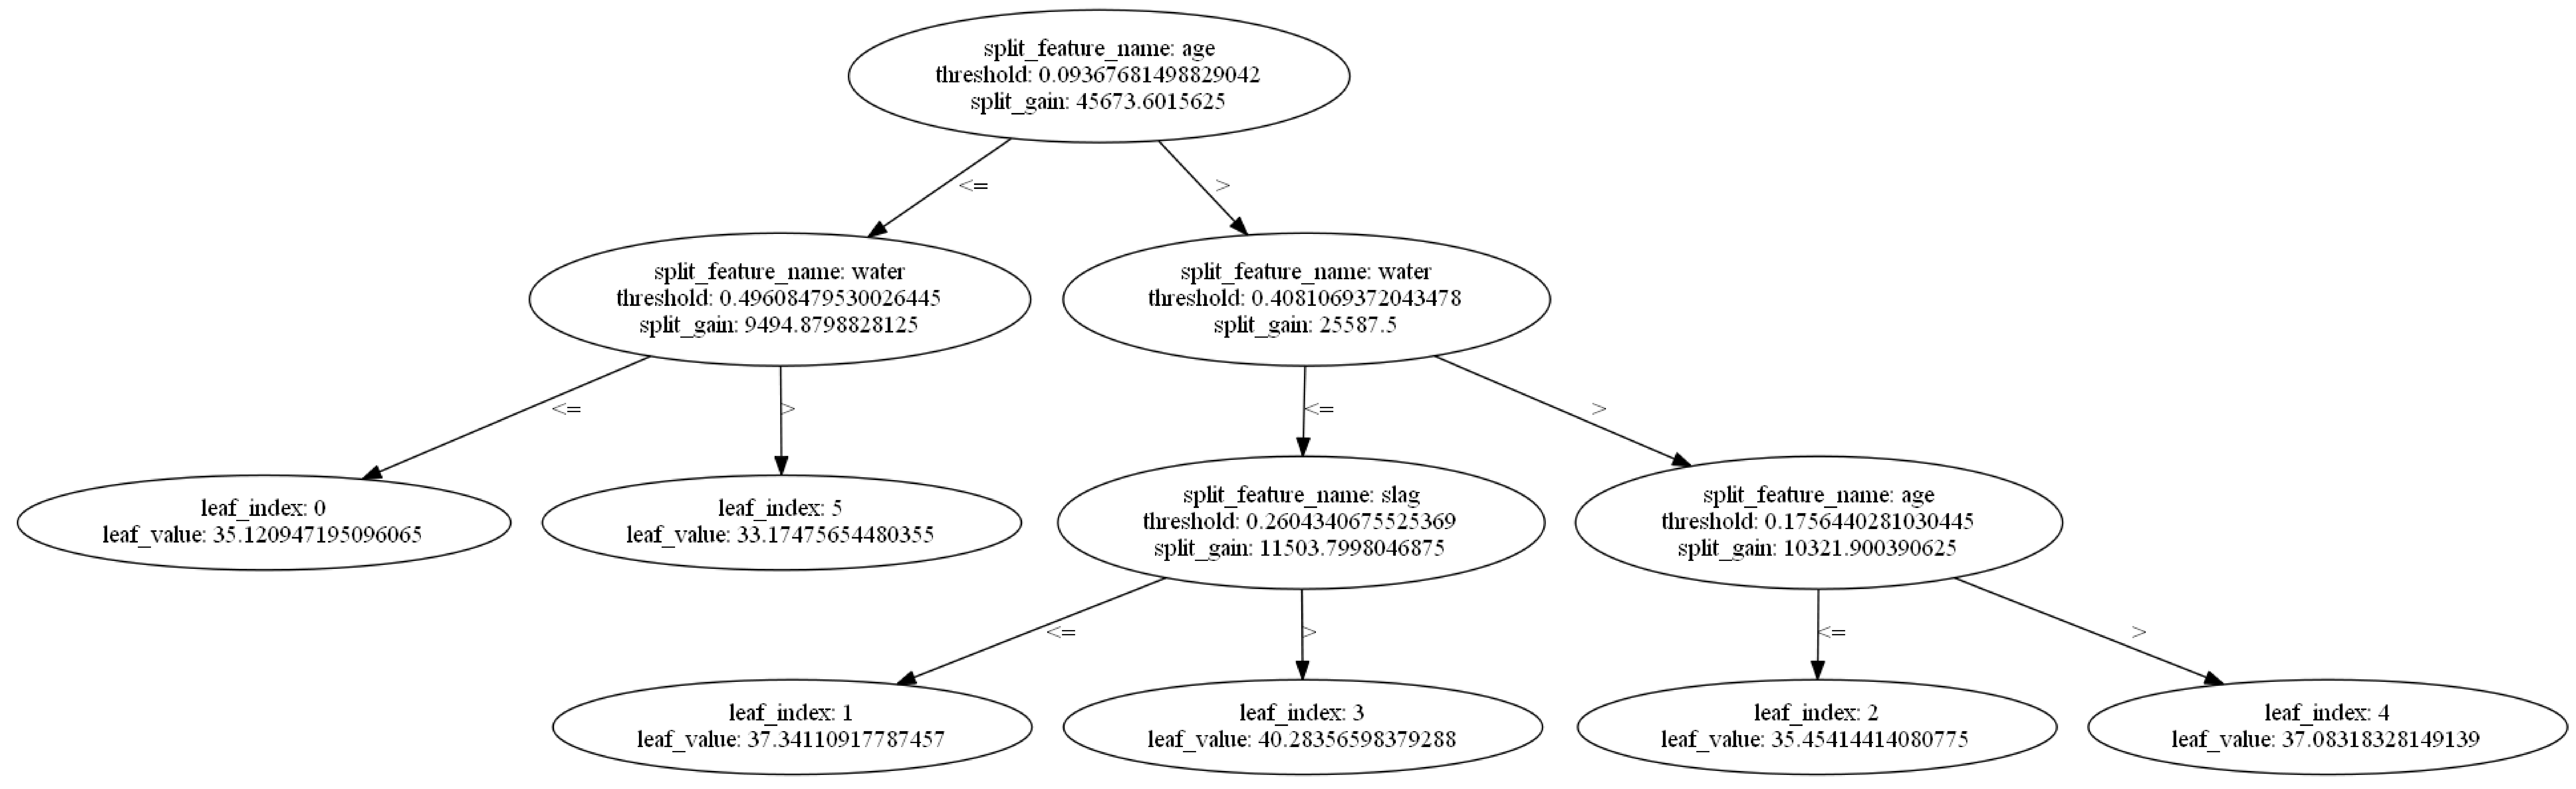

In [39]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
print('Plotting 1st tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(lgbm, tree_index=0, figsize=(15, 15), show_info=['split_gain'])
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

The execution time might be slow. If it is, run the following code to visualize the first tree:

In [57]:
print('Plotting 1st tree with graphviz...')
graph = lgb.create_tree_digraph(lgbm, tree_index=0, name='Tree1')
graph.render(view=True)

Plotting 1st tree with graphviz...


'Tree1.gv.pdf'

Undestand what fuatures are important: I could use the Light GBM regressor with the 'feature_importances_' method.

Text(0, 0.5, 'Features')

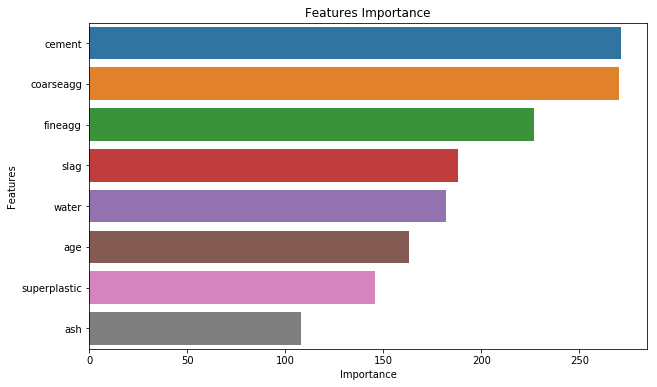

In [84]:
lgbm.fit(X_train,y_train)
plt.figure(figsize=(10,6))
plt.title("Features Importance")
features_importance = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(lgbm.feature_importances_)], axis=1)
features_importance.columns = ['Feature','Importance']
features_importance = features_importance.sort_values('Importance',ascending=False)
sns.barplot(x=features_importance.iloc[:,1], y=features_importance.iloc[:,0])
plt.xlabel("Importance")
plt.ylabel("Features")

Let's generate polynomial models reflecting the non-linear interaction between some dimensions:

In [85]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_train_copy = X_train.copy()
X_train_poly = poly.fit_transform(X_train_copy)
X_train_poly_names = []
for i in range(0,X_train_poly.shape[1]):
    X_train_poly_names.append('feature '+str(i))
X_train_poly = pd.DataFrame(X_train_poly)
X_train_poly.columns = X_train_poly_names
X_train_poly.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 27,feature 28,feature 29,feature 30,feature 31,feature 32,feature 33,feature 34,feature 35,feature 36
0,1.0,0.653147,0.403450,0.000,0.517734,0.368876,0.603060,0.242471,0.126464,0.263512,...,0.190980,0.312225,0.125535,0.065475,0.222454,0.089442,0.046649,0.146224,0.076265,0.030664
1,1.0,0.231833,0.511686,0.716,0.663289,0.424207,0.235823,0.266718,0.126464,0.118626,...,0.281372,0.156419,0.176911,0.083882,0.100038,0.113144,0.053647,0.062898,0.029823,0.033730
2,1.0,0.981794,0.000000,0.000,0.619070,0.000000,0.972097,0.048494,0.838407,0.000000,...,0.000000,0.601796,0.030021,0.519033,0.000000,0.000000,0.000000,0.047141,0.815013,0.040658
3,1.0,0.802770,0.000000,0.000,0.582220,0.000000,0.717072,0.357325,0.126464,0.000000,...,0.000000,0.417494,0.208042,0.073630,0.000000,0.000000,0.000000,0.256228,0.090684,0.045189
4,1.0,0.577610,0.000000,0.487,0.357439,0.544092,0.518752,0.718734,0.126464,0.000000,...,0.194480,0.185422,0.256904,0.045203,0.282249,0.391058,0.068808,0.372845,0.065603,0.090894


I will apply the same transformation to the test set:

In [86]:
X_test_copy = X_test.copy()
X_test_poly = poly.transform(X_test_copy)
X_test_poly_names = []
for i in range(0,X_test_poly.shape[1]):
    X_test_poly_names.append('feature '+str(i))
X_test_poly = pd.DataFrame(X_test_poly)
X_test_poly.columns = X_test_poly_names
X_test_poly.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 27,feature 28,feature 29,feature 30,feature 31,feature 32,feature 33,feature 34,feature 35,feature 36
0,1.0,0.810404,0.263495,0.0000,0.235836,0.525648,0.437444,0.658754,0.257611,0.213537,...,0.123967,0.103165,0.155358,0.060754,0.229942,0.346273,0.135413,0.288168,0.112690,0.169703
1,1.0,0.520069,0.000000,0.4940,0.225702,0.654755,0.560456,0.752935,0.257611,0.000000,...,0.147780,0.126496,0.169939,0.058143,0.366961,0.492988,0.168672,0.421987,0.144380,0.193965
2,1.0,0.708591,0.105732,0.0000,0.978351,0.000000,0.393039,0.193977,1.704918,0.074921,...,0.000000,0.384530,0.189777,1.668008,0.000000,0.000000,0.000000,0.076240,0.670100,0.330714
3,1.0,0.280655,0.117418,0.6215,0.336251,0.497983,0.839484,0.516080,0.060890,0.032954,...,0.167447,0.282277,0.173532,0.020474,0.418049,0.256999,0.030322,0.433241,0.051116,0.031424
4,1.0,0.641091,0.000000,0.0000,0.655919,0.000000,0.501050,0.556406,1.704918,0.000000,...,0.000000,0.328648,0.364957,1.118288,0.000000,0.000000,0.000000,0.278787,0.854249,0.948627


Tuning the poly dataset using Light GBM:

In [87]:
param_dist = {'application': ['regression'],
              'feature_fraction': np.linspace(0.3,1,8),
              'erbose_eval': [False,True],
              'booster': ['dart','gbdt'],
              'num_leaves': sp_randint(2, X_train_poly.shape[0]),
              'max_depth': sp_randint(1, X_train_poly.shape[1]),
              'max_bin': sp_randint(10, 200),
              'n_estimators': sp_randint(10, 500),
              'learning_rate': np.linspace(0.01,1,30)}

tuning(LGBMRegressor(),param_dist,X_train=X_train_poly)

Expected execution time is about 0:03:19.595600 

Execution time = 0:04:19.313225 

The best combination of hyperparameters is:

 {'application': 'regression', 'booster': 'gbdt', 'erbose_eval': True, 'feature_fraction': 0.6, 'learning_rate': 0.04413793103448276, 'max_bin': 92, 'max_depth': 31, 'n_estimators': 490, 'num_leaves': 412}


Saving Light GBM hyperparameters poly:

In [88]:
lgbm_hyperparameters_poly = {'application': 'regression', 
                             'booster': 'gbdt', 
                             'erbose_eval': True, 
                             'feature_fraction': 0.6, 
                             'learning_rate': 0.04413793103448276, 
                             'max_bin': 92, 
                             'max_depth': 31, 
                             'n_estimators': 490, 
                             'num_leaves': 412}

Evaluation of the Light GBM using the new X poly:

In [89]:
lgbm_poly = LGBMRegressor(application=lgbm_hyperparameters_poly.get('application'),
                          objective=lgbm_hyperparameters_poly.get('objective'),
                          is_unbalance=lgbm_hyperparameters_poly.get('is_unbalance'),
                          feature_fraction=lgbm_hyperparameters_poly.get('feature_fraction'),
                          bagging_fraction=lgbm_hyperparameters_poly.get('bagging_fraction'),
                          bagging_freq=lgbm_hyperparameters_poly.get('bagging_freq'),
                          verbose=lgbm_hyperparameters_poly.get('verbose'),
                          booster=lgbm_hyperparameters_poly.get('booster'),                  
                          erbose_eval=lgbm_hyperparameters_poly.get('erbose_eval'),
                          num_leaves=lgbm_hyperparameters_poly.get('num_leaves'),
                          max_depth=lgbm_hyperparameters_poly.get('max_depth'),
                          max_bin=lgbm_hyperparameters_poly.get('max_bin'),                      
                          n_estimators=lgbm_hyperparameters_poly.get('n_estimators'),     
                          learning_rate=lgbm_hyperparameters_poly.get('learning_rate'), 
                          random_state=1)

models_evaluation([{'label': 'Light GBM','model': lgbm_poly,},], X_train_poly, X_test_poly)

,MAE,MEA training
Model,,
Light GBM,3.067,0.579


The performance slightly improved. Let's try to plot the importance of the new features:

Text(0, 0.5, 'Features')

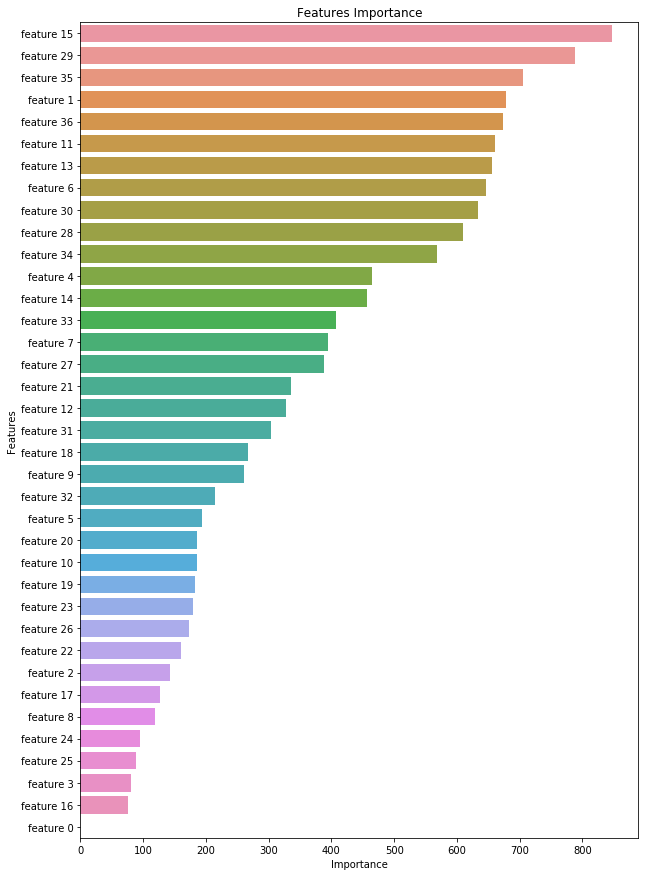

In [90]:
lgbm_poly.fit(X_train_poly,y_train)
plt.figure(figsize=(10,15))
plt.title("Features Importance")
features_importance = pd.concat([pd.DataFrame(X_train_poly.columns),pd.DataFrame(lgbm_poly.feature_importances_)], axis=1)
features_importance.columns = ['Feature','Importance']
features_importance = features_importance.sort_values('Importance',ascending=False)
sns.barplot(x=features_importance.iloc[:,1], y=features_importance.iloc[:,0])
plt.xlabel("Importance")
plt.ylabel("Features")

I could try to select only the most important features:

In [93]:
X_train_poly_5 = X_train_poly[features_importance['Feature'][:10].to_list()]
X_test_poly_5 = X_test_poly[features_importance['Feature'][:10].to_list()]

param_dist = {'application': ['regression'],
              'feature_fraction': np.linspace(0.3,1,8),
              'erbose_eval': [False,True],
              'booster': ['dart','gbdt'],
              'num_leaves': sp_randint(2, X_train_poly_5.shape[0]),
              'max_depth': sp_randint(1, X_train_poly_5.shape[1]),
              'max_bin': sp_randint(10, 200),
              'n_estimators': sp_randint(10, 500),
              'learning_rate': np.linspace(0.01,1,30)}

tuning(LGBMRegressor(),param_dist,X_train=X_train_poly_5)

Expected execution time is about 0:01:11.560000 

Execution time = 0:02:03.377108 

The best combination of hyperparameters is:

 {'application': 'regression', 'booster': 'dart', 'erbose_eval': False, 'feature_fraction': 0.7, 'learning_rate': 0.11241379310344828, 'max_bin': 80, 'max_depth': 8, 'n_estimators': 240, 'num_leaves': 85}


In [94]:
lgbm_hyperparameters_poly_5 = {'application': 'regression', 
                               'booster': 'dart', 
                               'erbose_eval': False, 
                               'feature_fraction': 0.7, 
                               'learning_rate': 0.11241379310344828, 
                               'max_bin': 80, 
                               'max_depth': 8, 
                               'n_estimators': 240, 
                               'num_leaves': 85}

lgbm_poly_5 = LGBMRegressor(application=lgbm_hyperparameters_poly_5.get('application'),
                           objective=lgbm_hyperparameters_poly_5.get('objective'),
                           is_unbalance=lgbm_hyperparameters_poly_5.get('is_unbalance'),
                           feature_fraction=lgbm_hyperparameters_poly_5.get('feature_fraction'),
                           bagging_fraction=lgbm_hyperparameters_poly_5.get('bagging_fraction'),
                           bagging_freq=lgbm_hyperparameters_poly_5.get('bagging_freq'),
                           verbose=lgbm_hyperparameters_poly_5.get('verbose'),
                           booster=lgbm_hyperparameters_poly_5.get('booster'),                  
                           erbose_eval=lgbm_hyperparameters_poly_5.get('erbose_eval'),
                           num_leaves=lgbm_hyperparameters_poly_5.get('num_leaves'),
                           max_depth=lgbm_hyperparameters_poly_5.get('max_depth'),
                           max_bin=lgbm_hyperparameters_poly_5.get('max_bin'),                      
                           n_estimators=lgbm_hyperparameters_poly_5.get('n_estimators'),     
                           learning_rate=lgbm_hyperparameters_poly_5.get('learning_rate'), 
                           random_state=1)

models_evaluation([{'label': 'Light GBM','model': lgbm_poly_5,},],X_train_poly_5, X_test_poly_5)

,MAE,MEA training
Model,,
Light GBM,4.025,1.167


The model is faster, but the MAE increased. I could try to reduce the size of the dataset using PCA.

## PCA: Principal Component Analysis

The optimal number of Principal Components is 10


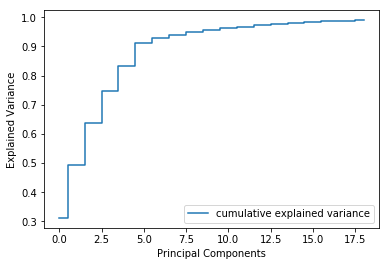

In [95]:
pca = PCA()
pca.fit(X_train_poly)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
cum_var_exp = cum_var_exp[cum_var_exp<0.99]
plt.step(range(0, cum_var_exp.shape[0]),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
print('The optimal number of Principal Components is %d' % d)
plt.show()

Applying PCA indipendently on Xpoly_train and Xpoly_test to avoid overfitting:

In [96]:
pca = PCA(n_components = d)
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

Tuning the PCA dataset using Light GBM:

In [88]:
param_dist = {'application': ['regression'],
              'feature_fraction': np.linspace(0.3,1,8),
              'erbose_eval': [False,True],
              'booster': ['dart','gbdt'],
              'num_leaves': sp_randint(2, X_train_pca.shape[0]),
              'max_depth': sp_randint(1, X_train_pca.shape[1]),
              'max_bin': sp_randint(10, 200),
              'n_estimators': sp_randint(10, 500),
              'learning_rate': np.linspace(0.01,1,30)}

tuning(LGBMRegressor(),param_dist,X_train=X_train_pca)

Expected execution time is about 0:01:09.951340 

Execution time = 0:01:25.716551 

The best combination of hyperparameters is:

 {'application': 'regression', 'booster': 'gbdt', 'erbose_eval': False, 'feature_fraction': 0.7999999999999999, 'learning_rate': 0.21482758620689657, 'max_bin': 23, 'max_depth': 5, 'n_estimators': 289, 'num_leaves': 408}


Saving Light GBM hyperparameters for PCA:

In [97]:
lgbm_hyperparameters_pca = {'application': 'regression', 
                            'booster': 'gbdt', 
                            'erbose_eval': False, 
                            'feature_fraction': 0.7999999999999999, 
                            'learning_rate': 0.21482758620689657, 
                            'max_bin': 23, 
                            'max_depth': 5, 
                            'n_estimators': 289, 
                            'num_leaves': 408}

Evaluation of the Light GBM using the PCA on X poly:

In [98]:
lgbm_pca = LGBMRegressor(application=lgbm_hyperparameters_pca.get('application'),
                         objective=lgbm_hyperparameters_pca.get('objective'),
                         is_unbalance=lgbm_hyperparameters_pca.get('is_unbalance'),
                         feature_fraction=lgbm_hyperparameters_pca.get('feature_fraction'),
                         bagging_fraction=lgbm_hyperparameters_pca.get('bagging_fraction'),
                         bagging_freq=lgbm_hyperparameters_pca.get('bagging_freq'),
                         verbose=lgbm_hyperparameters_pca.get('verbose'),
                         booster=lgbm_hyperparameters_pca.get('booster'),                  
                         erbose_eval=lgbm_hyperparameters_pca.get('erbose_eval'),
                         num_leaves=lgbm_hyperparameters_pca.get('num_leaves'),
                         max_depth=lgbm_hyperparameters_pca.get('max_depth'),
                         max_bin=lgbm_hyperparameters_pca.get('max_bin'),                      
                         n_estimators=lgbm_hyperparameters_pca.get('n_estimators'),     
                         learning_rate=lgbm_hyperparameters_pca.get('learning_rate'), 
                         random_state=1)

models_evaluation([{'label': 'Light GBM','model': lgbm_pca,},],X_train_pca, X_test_pca)

,MAE,MEA training
Model,,
Light GBM,5.178,1.08


PCA didn't help at all. We also overfitted. 

Another strategy might be building separate models for the 2 groups. Below I get all the subset I need:

In [99]:
X_train_poly_group = pd.concat([X_train_poly,train.iloc[:,-1:]],axis=1)
X_train_poly_group_0 = X_train_poly_group[X_train_poly_group['group']==0]
X_train_poly_group_0 = X_train_poly_group_0.drop('group',axis=1)
X_train_poly_group_1 = X_train_poly_group[X_train_poly_group['group']==1]
X_train_poly_group_1 = X_train_poly_group_1.drop('group',axis=1)

y_train_poly_group = pd.concat([y_train,train.iloc[:,-1:]],axis=1)
y_train_poly_group_0 = y_train_poly_group[y_train_poly_group['group']==0]
y_train_poly_group_0 = y_train_poly_group_0.drop('group',axis=1)
y_train_poly_group_1 = y_train_poly_group[y_train_poly_group['group']==1]
y_train_poly_group_1 = y_train_poly_group_1.drop('group',axis=1)


X_test_poly_group = pd.concat([X_test_poly,test.iloc[:,-1:]],axis=1)
X_test_poly_group_0 = X_test_poly_group[X_test_poly_group['group']==0]
X_test_poly_group_0 = X_test_poly_group_0.drop('group',axis=1)
X_test_poly_group_1 = X_test_poly_group[X_test_poly_group['group']==1]
X_test_poly_group_1 = X_test_poly_group_1.drop('group',axis=1)

y_test_poly_group = pd.concat([y_test,test.iloc[:,-1:]],axis=1)
y_test_poly_group_0 = y_test_poly_group[y_test_poly_group['group']==0]
y_test_poly_group_0 = y_test_poly_group_0.drop('group',axis=1)
y_test_poly_group_1 = y_test_poly_group[y_test_poly_group['group']==1]
y_test_poly_group_1 = y_test_poly_group_1.drop('group',axis=1)

Tuning the poly dataset using Light GBM for group 0:

In [171]:
param_dist = {'application': ['regression'],
              'feature_fraction': np.linspace(0.3,1,8),
              'erbose_eval': [False,True],
              'booster': ['dart','gbdt'],
              'num_leaves': sp_randint(2, X_train_poly_group_0.shape[0]),
              'max_depth': sp_randint(1, X_train_poly_group_0.shape[1]),
              'max_bin': sp_randint(10, 200),
              'n_estimators': sp_randint(10, 500),
              'learning_rate': np.linspace(0.01,1,30)}

tuning(LGBMRegressor(),param_dist,X_train=X_train_poly_group_0, y_train=y_train_poly_group_0)

Expected execution time is about 0:01:24.657350 

Execution time = 0:01:25.772547 

The best combination of hyperparameters is:

 {'application': 'regression', 'booster': 'dart', 'erbose_eval': False, 'feature_fraction': 0.39999999999999997, 'learning_rate': 0.41965517241379313, 'max_bin': 81, 'max_depth': 7, 'n_estimators': 291, 'num_leaves': 180}


Saving Light GBM hyperparameters for group 0:

In [100]:
lgbm_hyperparameters_group_0 = {'application': 'regression', 
                                'booster': 'dart', 
                                'erbose_eval': False, 
                                'feature_fraction': 0.39999999999999997, 
                                'learning_rate': 0.41965517241379313, 
                                'max_bin': 81, 
                                'max_depth': 7, 
                                'n_estimators': 291, 
                                'num_leaves': 180}

Tuning the poly dataset using Light GBM for group 1:

In [172]:
param_dist = {'application': ['regression'],
              'feature_fraction': np.linspace(0.3,1,8),
              'erbose_eval': [False,True],
              'booster': ['dart','gbdt'],
              'num_leaves': sp_randint(2, X_train_poly_group_1.shape[0]),
              'max_depth': sp_randint(1, X_train_poly_group_1.shape[1]),
              'max_bin': sp_randint(10, 200),
              'n_estimators': sp_randint(10, 500),
              'learning_rate': np.linspace(0.01,1,30)}

tuning(LGBMRegressor(),param_dist,X_train=X_train_poly_group_1, y_train=y_train_poly_group_1)

Expected execution time is about 0:01:06.000700 

Execution time = 0:01:16.983038 

The best combination of hyperparameters is:

 {'application': 'regression', 'booster': 'dart', 'erbose_eval': True, 'feature_fraction': 0.3, 'learning_rate': 0.14655172413793105, 'max_bin': 35, 'max_depth': 35, 'n_estimators': 481, 'num_leaves': 284}


Saving Light GBM hyperparameters for group 1:

In [101]:
lgbm_hyperparameters_group_1 = {'application': 'regression', 
                                'booster': 'dart', 
                                'erbose_eval': True, 
                                'feature_fraction': 0.3, 
                                'learning_rate': 0.14655172413793105, 
                                'max_bin': 35, 
                                'max_depth': 35, 
                                'n_estimators': 481, 
                                'num_leaves': 284}

Evaluation of the 2 models:

,MAE,MEA training
Group,,
0,3.344,0.225
1,3.237,0.442
total,3.297,0.320


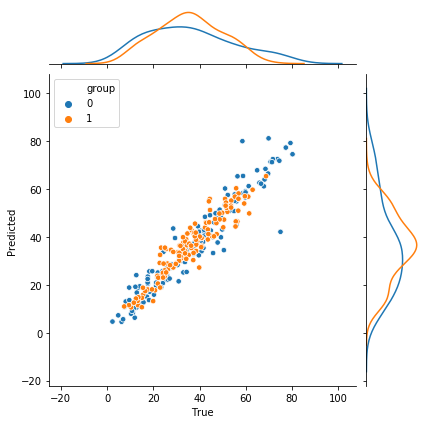

In [102]:
lgbm_group_0 = LGBMRegressor(application=lgbm_hyperparameters_group_0.get('application'),
                             objective=lgbm_hyperparameters_group_0.get('objective'),
                             is_unbalance=lgbm_hyperparameters_group_0.get('is_unbalance'),
                             feature_fraction=lgbm_hyperparameters_group_0.get('feature_fraction'),
                             bagging_fraction=lgbm_hyperparameters_group_0.get('bagging_fraction'),
                             bagging_freq=lgbm_hyperparameters_group_0.get('bagging_freq'),
                             verbose=lgbm_hyperparameters_group_0.get('verbose'),
                             booster=lgbm_hyperparameters_group_0.get('booster'),                  
                             erbose_eval=lgbm_hyperparameters_group_0.get('erbose_eval'),
                             num_leaves=lgbm_hyperparameters_group_0.get('num_leaves'),
                             max_depth=lgbm_hyperparameters_group_0.get('max_depth'),
                             max_bin=lgbm_hyperparameters_group_0.get('max_bin'),                      
                             n_estimators=lgbm_hyperparameters_group_0.get('n_estimators'),     
                             learning_rate=lgbm_hyperparameters_group_0.get('learning_rate'), 
                             random_state=1)

lgbm_group_1 = LGBMRegressor(application=lgbm_hyperparameters_group_1.get('application'),
                             objective=lgbm_hyperparameters_group_1.get('objective'),
                             is_unbalance=lgbm_hyperparameters_group_1.get('is_unbalance'),
                             feature_fraction=lgbm_hyperparameters_group_1.get('feature_fraction'),
                             bagging_fraction=lgbm_hyperparameters_group_1.get('bagging_fraction'),
                             bagging_freq=lgbm_hyperparameters_group_1.get('bagging_freq'),
                             verbose=lgbm_hyperparameters_group_1.get('verbose'),
                             booster=lgbm_hyperparameters_group_1.get('booster'),                  
                             erbose_eval=lgbm_hyperparameters_group_1.get('erbose_eval'),
                             num_leaves=lgbm_hyperparameters_group_1.get('num_leaves'),
                             max_depth=lgbm_hyperparameters_group_1.get('max_depth'),
                             max_bin=lgbm_hyperparameters_group_1.get('max_bin'),                      
                             n_estimators=lgbm_hyperparameters_group_1.get('n_estimators'),     
                             learning_rate=lgbm_hyperparameters_group_1.get('learning_rate'), 
                             random_state=1)

model = lgbm_group_0
model.fit(X_train_poly_group_0, y_train_poly_group_0)
y_pred_group_0 = model.predict(X_test_poly_group_0)
y_pred_train_group_0 = model.predict(X_train_poly_group_0)
MAE_0 = round(metrics.mean_absolute_error(y_test_poly_group_0, y_pred_group_0),3)
MAE_0_train = round(metrics.mean_absolute_error(y_train_poly_group_0, y_pred_train_group_0),3)

model = lgbm_group_1
model.fit(X_train_poly_group_1, y_train_poly_group_1)
y_pred_group_1 = model.predict(X_test_poly_group_1)
y_pred_train_group_1 = model.predict(X_train_poly_group_1)
MAE_1 = round(metrics.mean_absolute_error(y_test_poly_group_1, y_pred_group_1),3)
MAE_1_train = round(metrics.mean_absolute_error(y_train_poly_group_1, y_pred_train_group_1),3)

MAE_tot = round(metrics.mean_absolute_error(pd.concat([y_test_poly_group_0,y_test_poly_group_1]), 
                                            pd.concat([pd.DataFrame(y_pred_group_0),pd.DataFrame(y_pred_group_1)])),
                3)
MAE_tot_train = round(metrics.mean_absolute_error(pd.concat([y_train_poly_group_0,y_train_poly_group_1]), 
                                                  pd.concat([pd.DataFrame(y_pred_train_group_0),pd.DataFrame(y_pred_train_group_1)])),
                      3)

group_0 = pd.concat([y_test_poly_group_0,pd.DataFrame(y_pred_group_0,index=y_test_poly_group_0.index)],axis=1)
group_0.columns = ['True','Predicted']
group_0['group'] = 0

group_1 = pd.concat([y_test_poly_group_1,pd.DataFrame(y_pred_group_1,index=y_test_poly_group_1.index)],axis=1)
group_1.columns = ['True','Predicted']
group_1['group'] = 1

results = pd.concat([group_0,group_1])

grid = sns.JointGrid(x='True', y='Predicted', data=results)
g = grid.plot_joint(sns.scatterplot, hue='group', data=results, s=30)
sns.kdeplot(results.loc[results['group']==0, 'True'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(results.loc[results['group']==1, 'True'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(results.loc[results['group']==0, 'Predicted'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(results.loc[results['group']==1, 'Predicted'], ax=g.ax_marg_y, vertical=True, legend=False)
plt.legend(loc='upper left')

group = [0,1,'total']
MAE = [MAE_0,MAE_1,MAE_tot]
MAE_train = [MAE_0_train,MAE_1_train,MAE_tot_train]
report = pd.concat([pd.DataFrame(group),pd.DataFrame(MAE),pd.DataFrame(MAE_train)],axis=1)
report.columns = ['Group','MAE','MEA training']
report.set_index('Group',inplace=True,drop=True)
report

Also in this case I was not able to improve the perfomance. It is also easier to overfit because I have smaller datasets. Since none of the techniques seem to help, I'd keep the poly Light GBM for production, which is fast and efficient.

Model performance range at 95% confidence level:

I am 95% confident that the MAE of the model in production will be between 2.8 and 3.6


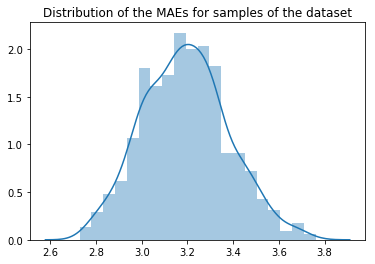

In [121]:
MAEs = []
for i in range(1,1000):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=i)
    for train_index, test_index in split.split(df, df['group']):
        train = df.loc[train_index]
        test = df.loc[test_index]
        
    X_train_poly = train.drop(['Target','group'],axis=1)
    X_test_poly = test.drop(['Target','group'],axis=1)
    y_train_poly = train['Target']
    y_test_poly = test['Target']
    lgbm_poly.fit(X_train_poly, y_train_poly)
    y_pred = lgbm_poly.predict(X_test_poly)
    MAE = metrics.mean_absolute_error(y_test_poly, y_pred)
    MAEs.append(MAE)
    
sns.distplot(MAEs, kde=True).set_title('Distribution of the MAEs for samples of the dataset')
alpha = 0.95                             
p = 100*((1.0-alpha)/2.0)             
lower = max(0.0, np.percentile(MAEs, p))  
upper = max(0.0, np.percentile(MAEs, 100-p))
print('I am %.0f%% confident that the MAE of the model in production will be between %.1f and %.1f' % (alpha*100, lower, upper))